# Lotte E-commerce sales data analysis

### Setting plot theme 

In [1]:
import numpy as np

from jupyterthemes import jtplot
jtplot.style(theme = 'oceans16')
jtplot.style(context='talk', fscale=2, spines=False, gridlines='none')

###### Reference

In [2]:
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

### Read in the data

In [3]:
import sys
import types

import sklearn
import pandas as pd
import numpy as np
#import tensorflow as tf # python 3.7 not yet supported
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df_data_original = pd.read_csv('lotte_super_data_update_1.csv')
df_data_original.head()

/Users/won-joonchoi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (54,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SL_DT,ST_CD,ST_NM,ST_DO,ST_GU,ST_EARN,ST_AGE,PR_CAT1,PR_CAT2,PR_CAT3,SL_SUM,SL_QUAN,SL_PRICE,SL_DISCOUNT,SL_DICOUNT_RT,PROMOTION,CLOSE,CANICULE,NA_HOLIDAY,EARTHQUAKE,WEEKEND,WEEK,DAY,YEAR,MONTH,PM10,PM2.5,OZONE,NO2,CO,SO2,AV_TPRT,LST_TPRT,LST_TPRT_TI,HI_TPRT,HI_TPRT_TI,MI10_GT_AMRN,MI10_GT_AMRN_TI,HR01_GT_AMRN,HR01_GT_AMRN_TI,D_AMRN,MAX_MMNT_WNSP,MAX_MMNT_WNSP_WNDR,MAX_MMNT_WNSP_TI,MAX_WNSP,MAX_WNSP_WNDR,MAX_WNSP_TI,AV_WNSP,WNRN_SUM_V,AV_DPN_TMPR_V,MIN_PTY_HMDT,AV_PTY_HMDT_TI,AV_PTY_HMDT,AV_STPR_V,AV_SPOT_ATMP,HI_SEVL_ATMP,HI_SEVL_ATMP_TI,LST_SEVL_ATMP,LST_SEVL_ATMP_TI,AV_SEVL_ATMP,PSSN_HR,SUM_SNSH_HR,GT_HR01_SLRN_TI,GT_HR01_SLRN,TOT_SLRN,D_MAX_AFSC,D_MAX_AFSC_TI,D_MAX_AMSN,D_MAX_SNFL_TI,HR03_TOT_AFSC,AV_BEF_AMCL,AV_LRCL_AMCL,AV_SRER_TMPR_V,LST_GRTP_TMPR_V,AV_CM5_UNDR_TMPR_V,AV_CM10_UNDR_TMPR_V,AV_CM20_UNDR_TMPR_V,AV_CM30_UNDR_TMPR_V,CM50_UNDR_TMPR_V,CM100_UNDR_TMPR_V,CM150_UNDR_TMPR_V,CM300_UNDR_TMPR_V,CM500_UNDR_TMPR_V,TOT_LAG_AMEV,SUM_SMLL_AMEV,D_9H_FR_9H_TO_AMRN,FOG_CTN_HR
0,2017-01-01,110001,전농점,서울특별시,동대문구,B,3,음료,생수,생수,156110.0,147,1062,0,0.000,0,0,0,1,0,1,1,일,2017,1,81,64,0.003,0.057,1.0,0.005,2.7,-1.6,540.0,6.9,1419.0,NaN,NaN,NaN,NaN,NaN,4.5,20.0,1050.0,2.8,50.0,2059.0,1.5,"1,333",-1.2,59.0,1342.0,75.9,5.6,NaN,NaN,928.0,NaN,2315.0,NaN,9.6,1.7,1300.0,0.9,4.38,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.9,-5.1,0.5,0.6,1.8,2.7,3.8,7.1,10.2,15.7,17.5,0.7,1.0,0.3,NaN
1,2017-01-01,110001,전농점,서울특별시,동대문구,B,3,주류,맥주,국산맥주,376910.0,91,4142,3690,0.010,0,0,0,1,0,1,1,일,2017,1,81,64,0.003,0.057,1.0,0.005,2.7,-1.6,540.0,6.9,1419.0,NaN,NaN,NaN,NaN,NaN,4.5,20.0,1050.0,2.8,50.0,2059.0,1.5,"1,333",-1.2,59.0,1342.0,75.9,5.6,NaN,NaN,928.0,NaN,2315.0,NaN,9.6,1.7,1300.0,0.9,4.38,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.9,-5.1,0.5,0.6,1.8,2.7,3.8,7.1,10.2,15.7,17.5,0.7,1.0,0.3,NaN
2,2017-01-01,110001,전농점,서울특별시,동대문구,B,3,주류,맥주,수입맥주,336460.0,158,2129,0,0.000,0,0,0,1,0,1,1,일,2017,1,81,64,0.003,0.057,1.0,0.005,2.7,-1.6,540.0,6.9,1419.0,NaN,NaN,NaN,NaN,NaN,4.5,20.0,1050.0,2.8,50.0,2059.0,1.5,"1,333",-1.2,59.0,1342.0,75.9,5.6,NaN,NaN,928.0,NaN,2315.0,NaN,9.6,1.7,1300.0,0.9,4.38,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.9,-5.1,0.5,0.6,1.8,2.7,3.8,7.1,10.2,15.7,17.5,0.7,1.0,0.3,NaN
3,2017-01-01,110001,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석카레짜장,35040.0,18,1947,0,0.000,0,0,0,1,0,1,1,일,2017,1,81,64,0.003,0.057,1.0,0.005,2.7,-1.6,540.0,6.9,1419.0,NaN,NaN,NaN,NaN,NaN,4.5,20.0,1050.0,2.8,50.0,2059.0,1.5,"1,333",-1.2,59.0,1342.0,75.9,5.6,NaN,NaN,928.0,NaN,2315.0,NaN,9.6,1.7,1300.0,0.9,4.38,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.9,-5.1,0.5,0.6,1.8,2.7,3.8,7.1,10.2,15.7,17.5,0.7,1.0,0.3,NaN
4,2017-01-01,110001,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석밥,90950.0,15,6063,0,0.000,0,0,0,1,0,1,1,일,2017,1,81,64,0.003,0.057,1.0,0.005,2.7,-1.6,540.0,6.9,1419.0,NaN,NaN,NaN,NaN,NaN,4.5,20.0,1050.0,2.8,50.0,2059.0,1.5,"1,333",-1.2,59.0,1342.0,75.9,5.6,NaN,NaN,928.0,NaN,2315.0,NaN,9.6,1.7,1300.0,0.9,4.38,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.9,-5.1,0.5,0.6,1.8,2.7,3.8,7.1,10.2,15.7,17.5,0.7,1.0,0.3,NaN


## Exploration
- Explore store names, numbers of time series entries
- Look into categorical/continuous variable and their object types
- Histogram of variables
- Look into product types and their trends
- Create two versions of data: original & columns filtered with  missing values > 50%

In [4]:
# Copy original data
df_data_1 = df_data_original
df_data_1.describe()

,ST_CD,SL_SUM,SL_QUAN,SL_DISCOUNT,PROMOTION,CLOSE,CANICULE,NA_HOLIDAY,EARTHQUAKE,WEEKEND,WEEK,YEAR,MONTH,PM10,PM2.5,OZONE,NO2,CO,SO2,AV_TPRT,LST_TPRT,LST_TPRT_TI,HI_TPRT,HI_TPRT_TI,MI10_GT_AMRN,MI10_GT_AMRN_TI,HR01_GT_AMRN,HR01_GT_AMRN_TI,D_AMRN,MAX_MMNT_WNSP,MAX_MMNT_WNSP_WNDR,MAX_MMNT_WNSP_TI,MAX_WNSP,MAX_WNSP_WNDR,MAX_WNSP_TI,AV_WNSP,AV_DPN_TMPR_V,MIN_PTY_HMDT,AV_PTY_HMDT_TI,AV_PTY_HMDT,AV_STPR_V,HI_SEVL_ATMP_TI,LST_SEVL_ATMP_TI,PSSN_HR,SUM_SNSH_HR,GT_HR01_SLRN_TI,GT_HR01_SLRN,TOT_SLRN,D_MAX_AFSC,D_MAX_AFSC_TI,D_MAX_AMSN,D_MAX_SNFL_TI,HR03_TOT_AFSC,AV_BEF_AMCL,AV_LRCL_AMCL,AV_SRER_TMPR_V,LST_GRTP_TMPR_V,AV_CM5_UNDR_TMPR_V,AV_CM10_UNDR_TMPR_V,AV_CM20_UNDR_TMPR_V,AV_CM30_UNDR_TMPR_V,CM50_UNDR_TMPR_V,CM100_UNDR_TMPR_V,CM150_UNDR_TMPR_V,CM300_UNDR_TMPR_V,CM500_UNDR_TMPR_V,TOT_LAG_AMEV,SUM_SMLL_AMEV,D_9H_FR_9H_TO_AMRN,FOG_CTN_HR
count,638125.000000,6.381250e+05,638125.000000,6.381250e+05,638125.000000,638125.000000,638125.000000,638125.000000,638125.000000,638125.000000,638125.000000,638125.0,638125.000000,638125.000000,638125.000000,638125.000000,638125.000000,638125.000000,638125.000000,605739.000000,606377.000000,606377.000000,605613.000000,605613.000000,136948.000000,93650.000000,136948.000000,99143.000000,227987.000000,604867.000000,604867.000000,604867.000000,604867.000000,604867.000000,604867.000000,604127.000000,605739.000000,605613.000000,605613.000000,605739.000000,605739.000000,606377.000000,605613.000000,606377.000000,602582.000000,477098.000000,477024.000000,476361.000000,21268.000000,21186.000000,34855.000000,34855.000000,21268.000000,480714.000000,480714.000000,606377.000000,606377.000000,323823.000000,323823.000000,323823.000000,323823.000000,324373.000000,324373.000000,324373.000000,323627.000000,324373.000000,478527.000000,478527.000000,180686.000000,20902.000000
mean,110238.033316,8.849544e+04,36.281946,5.012723e+02,0.072939,0.016661,0.008340,0.048406,0.038773,0.252766,26.861891,2017.0,6.598621,40.356645,24.470055,0.025244,0.034798,0.511003,0.003847,12.634401,8.106121,911.128359,17.958200,1366.548393,2.448526,1119.270934,6.148049,1139.816043,8.412830,7.904537,238.503407,1387.486866,4.709730,243.035262,1402.835152,2.083321,4.754131,38.574322,1361.164701,62.393922,11.544674,1120.457158,1277.291556,12.195596,7.161053,1198.720179,1.864480,12.392333,1.652139,1210.102096,1.896603,740.218620,1.718441,4.491294,4.491294,14.594239,5.302073,14.328765,14.378124,14.350721,14.532066,14.793016,15.165558,15.605935,15.945872,15.825256,2.559711,3.657042,8.494855,2.389159
std,148.401050,1.654136e+05,79.489466,5.032656e+03,0.260036,0.127999,0.090942,0.214623,0.193054,0.434598,15.100416,0.0,3.452944,21.270892,14.102495,0.013869,0.012866,0.181535,0.001363,10.817176,11.199870,756.163157,10.963901,340.379852,3.888260,819.603470,11.054569,813.976426,20.383548,2.428085,87.851125,498.227620,1.431103,80.791050,497.357893,0.885177,12.240794,16.890611,338.685852,15.416158,8.644711,918.270411,758.201205,1.792265,3.990883,117.372191,0.758291,6.556732,2.010176,927.247981,1.780355,930.496494,2.067206,3.140901,3.140901,11.809856,11.979274,10.577109,10.280120,9.617602,9.328237,8.942641,7.573675,6.425131,3.863387,1.987959,1.545320,2.210126,19.625789,1.907830
min,110001.000000,-1.686300e+06,-408.000000,-7.746900e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2017.0,1.000000,6.000000,4.000000,0.002000,0.011000,0.200000,0.002000,-12.400000,-18.800000,1.000000,-6.700000,1.000000,0.000000,-2356.000000,0.000000,-2349.000000,0.000000,2.100000,20.000000,1.000000,1.300000,20.000000,2.000000,0.100000,-22.700000,7.000000,1.000000,15.500000,1.000000,1.000000,1.000000,9.500000,0.000000,200.000000,0.130000,0.020000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.400000,-20.200000,-2.800000,-1.100000,0.200000,0.900000,1.700000,3.700000,5.300000,9.200000,12.300000,0.300000,0.500000,0.000000,0.130000
25%,110108.000000,8.239000e+03,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2017.0,4.0

In [5]:
df_data_1['SL_SUM'].quantile()

24010.0

In [6]:
# Look into data types, seems there's some mis-labeled object types(=string)
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638125 entries, 0 to 638124
Data columns (total 87 columns):
SL_DT                  638125 non-null object
ST_CD                  638125 non-null int64
ST_NM                  638125 non-null object
ST_DO                  638125 non-null object
ST_GU                  638125 non-null object
ST_EARN                638125 non-null object
ST_AGE                 638125 non-null object
PR_CAT1                638125 non-null object
PR_CAT2                638125 non-null object
PR_CAT3                638125 non-null object
SL_SUM                 638125 non-null float64
SL_QUAN                638125 non-null int64
SL_PRICE               638125 non-null object
SL_DISCOUNT            638125 non-null int64
SL_DICOUNT_RT          638125 non-null object
PROMOTION              638125 non-null int64
CLOSE                  638125 non-null int64
CANICULE               638125 non-null int64
NA_HOLIDAY             638125 non-null int64
EARTHQUAKE           

#### Look into distributions

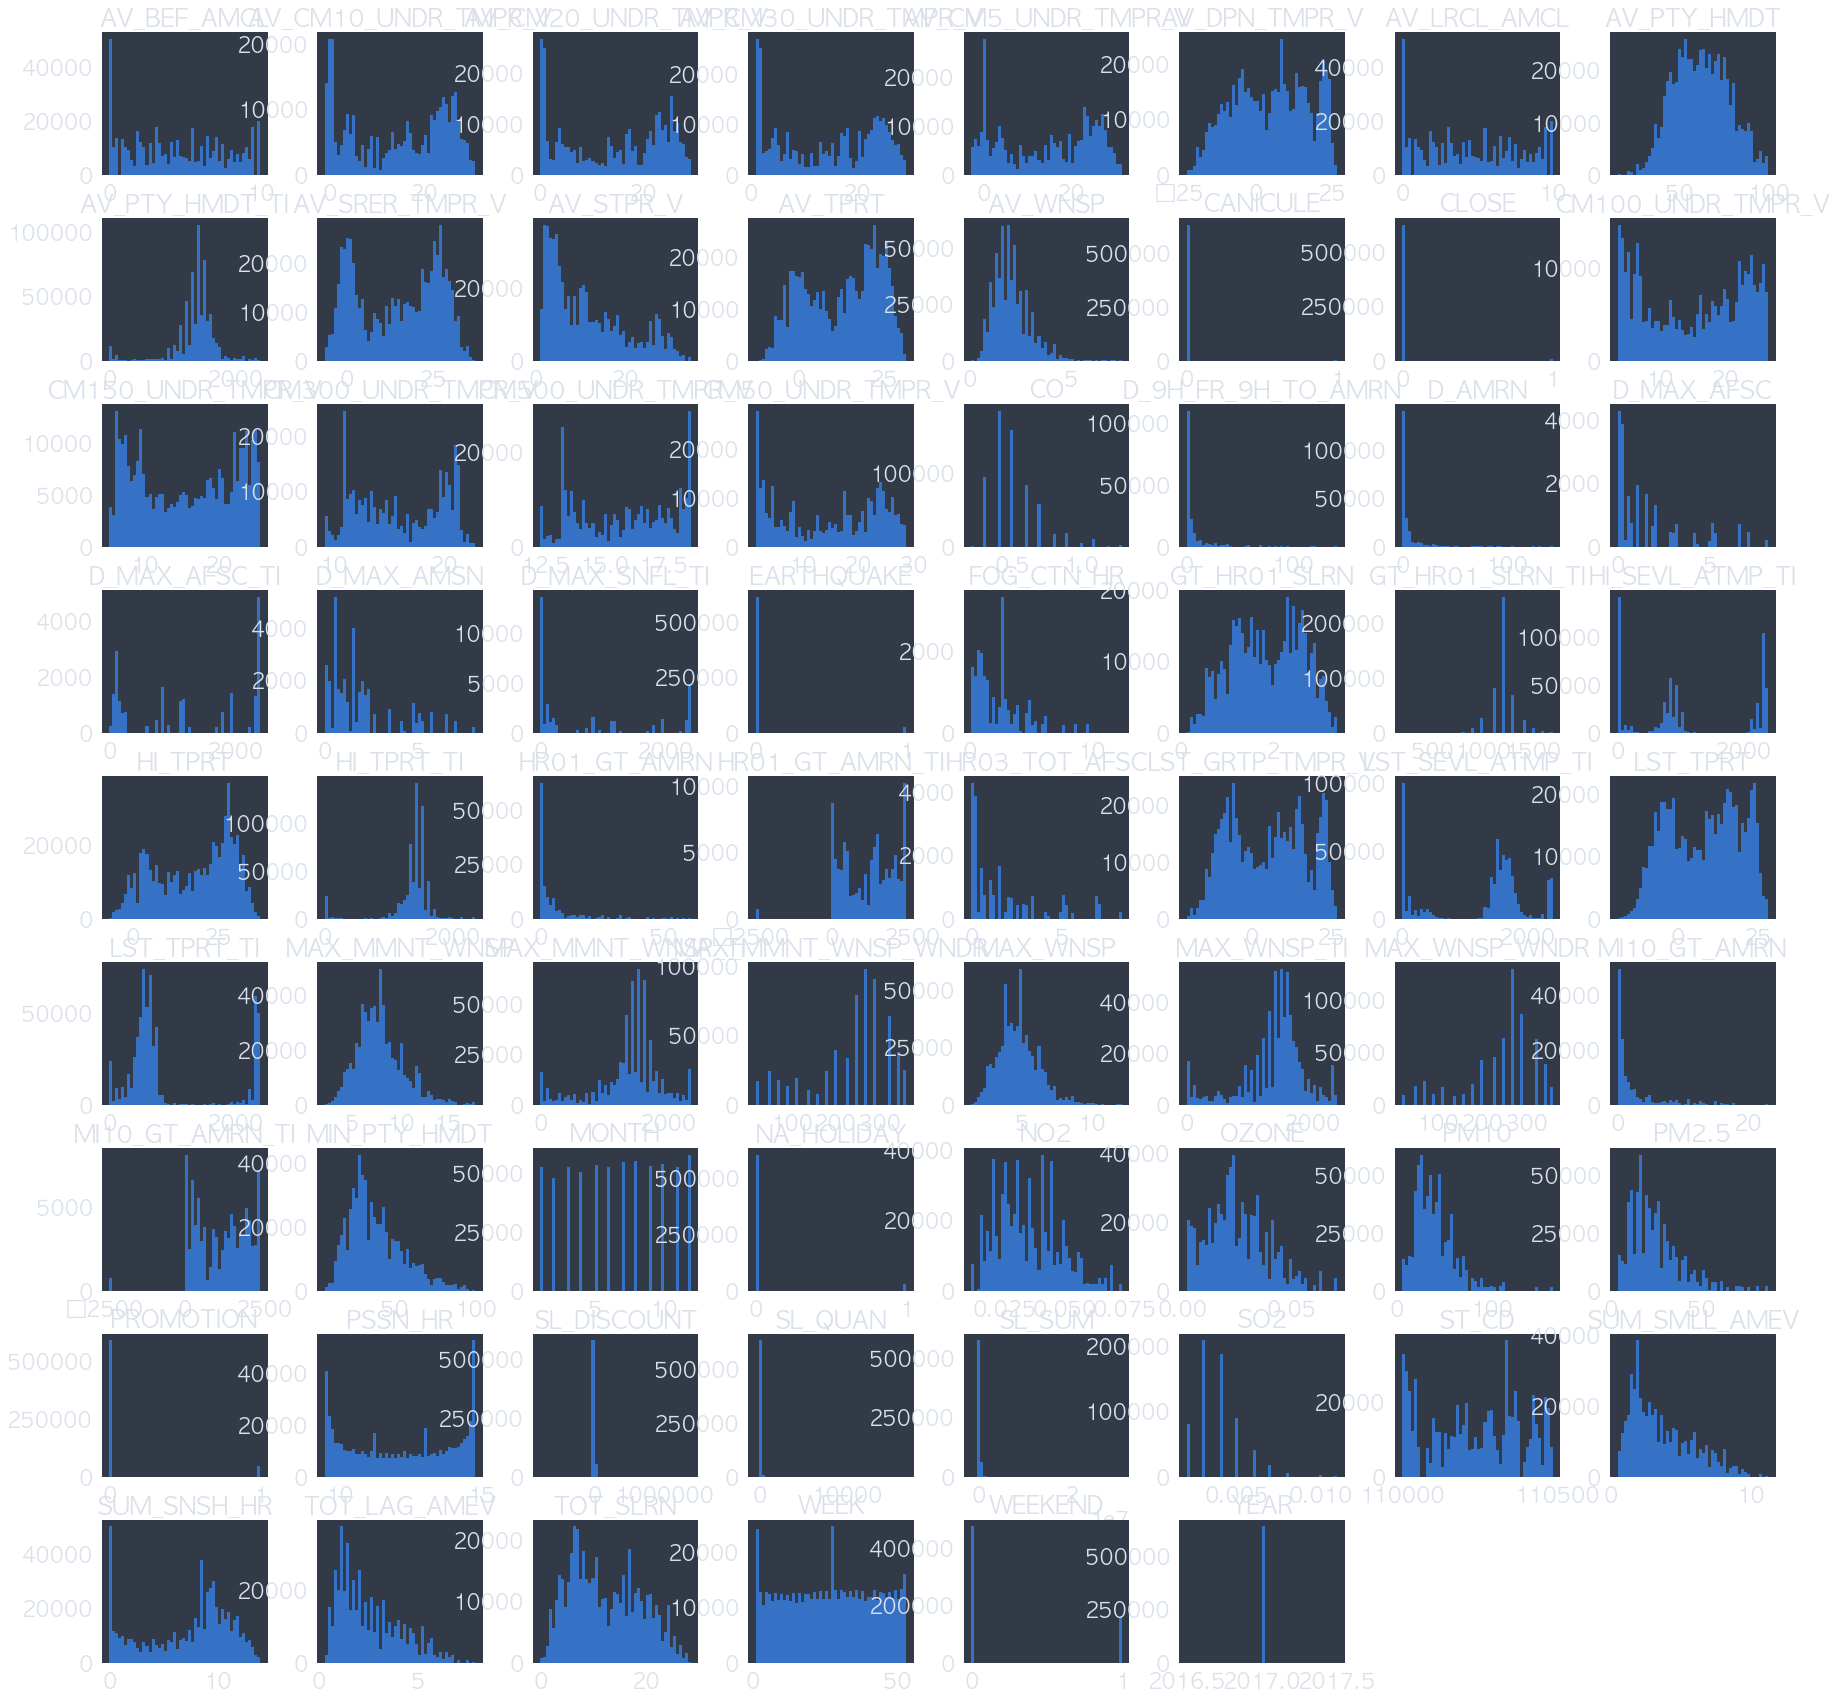

In [9]:
_ = df_data_1.hist(figsize=(30,30), bins =50)
plt.show()

- Look into store counts
- Number of date entries <b>per store

In [25]:
print("Number of unique stores:",len(df_data_1['ST_NM'].unique()))

Number of unique stores: 170


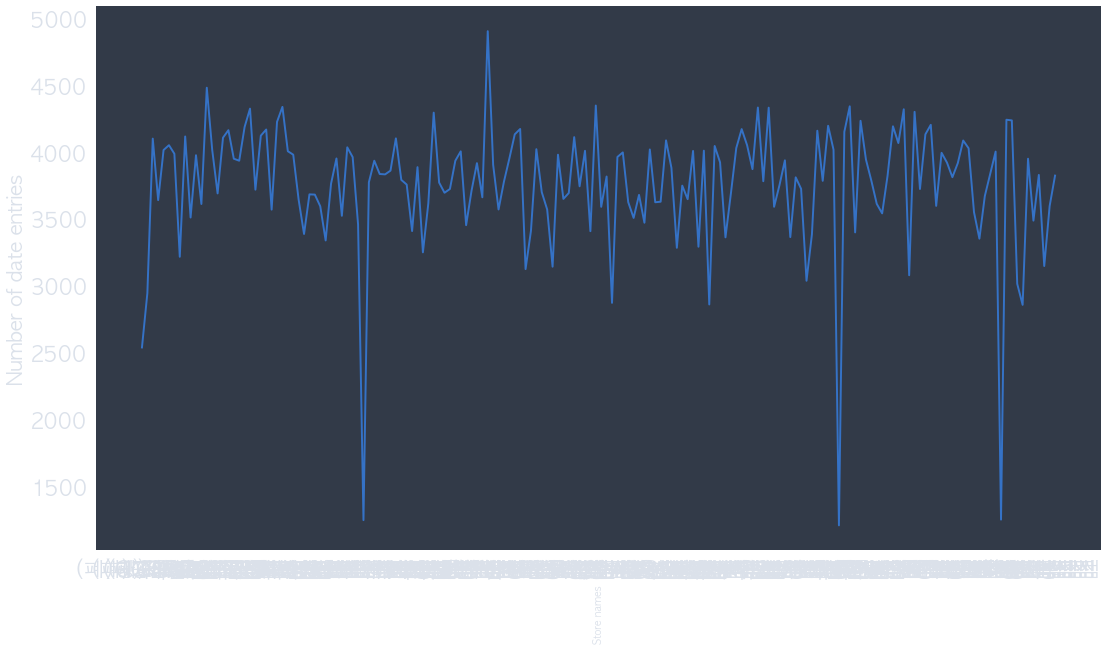

In [5]:
# Plot store name to # date entries
count_by_store = df_data_1.groupby(['ST_NM']).count()
x = count_by_store.index
y = count_by_store['SL_DT']

%matplotlib inline
plt.rc('font', family='AppleGothic') # 한글 설정!!!!!

plt.figure(figsize=(18,10))
ax = plt.plot(x,y)
_ = plt.xlabel('Store names', rotation=90, fontsize=10)
_ = plt.ylabel('Number of date entries', fontsize=20)

#### Let's see which stores have least & most entries

In [12]:
# 매장별 날짜 entry 수
temp = df_data_1.groupby('ST_NM').count().sort_values('SL_DT')
print('Stores with least number of entries')
pd.DataFrame(temp.index, temp['SL_DT'])

Stores with least number of entries


,ST_NM
SL_DT,
1215,위례우남점
1254,김포센터
1258,프리미엄공덕점
2543,(폐)공덕점
2861,한남더힐점
2864,신현센터
2876,송파센터
2948,(폐)광주역동점
3018,하남창우점


###### For reading in data on cloud

In [28]:
# from ibm_botocore.client import Config
# import ibm_boto3

# def __iter__(self): return 0

# # @hidden_cell
# # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# # You might want to remove those credentials before you share your notebook.
# client_d55ceaa8a8824a82a4fa29a058812518 = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='8WXa9rDV9yEbTpF5ei8_D26u0v5Tw5qZaBxMOYX6y_RR',
#     ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# body = client_d55ceaa8a8824a82a4fa29a058812518.get_object(Bucket='lotteecommerce-donotdelete-pr-hhbwfcbpqkpmpa',Key='lotte_super_data_update_1.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

### Take care of string type columns

In [29]:
# Below are Object columns, ones that SHOULD be categorical values
df_data_1[[name for name, dtype in df_data_1.dtypes.items() if dtype == 'object']]

,SL_DT,ST_NM,ST_DO,ST_GU,ST_EARN,ST_AGE,PR_CAT1,PR_CAT2,PR_CAT3,SL_PRICE,SL_DICOUNT_RT,DAY,WNRN_SUM_V,AV_SPOT_ATMP,HI_SEVL_ATMP,LST_SEVL_ATMP,AV_SEVL_ATMP
0,2017-01-01,전농점,서울특별시,동대문구,B,3,음료,생수,생수,1062,0.000,일,"1,333",NaN,NaN,NaN,NaN
1,2017-01-01,전농점,서울특별시,동대문구,B,3,주류,맥주,국산맥주,4142,0.010,일,"1,333",NaN,NaN,NaN,NaN
2,2017-01-01,전농점,서울특별시,동대문구,B,3,주류,맥주,수입맥주,2129,0.000,일,"1,333",NaN,NaN,NaN,NaN
3,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석카레짜장,1947,0.000,일,"1,333",NaN,NaN,NaN,NaN
4,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석밥,6063,0.000,일,"1,333",NaN,NaN,NaN,NaN
5,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석컵밥,2440,0.000,일,"1,333",NaN,NaN,NaN,NaN
6,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석죽,2490,0.000,일,"1,333",NaN,NaN,NaN,NaN
7,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석누룽지,5200,0.000,일,"1,333",NaN,NaN,NaN,NaN
8,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석면류,3980,0.000,일,"1,333",NaN,NaN,NaN,NaN
9,2017-01-01,전농점,서울특별시,동대문구,B,3,일반식품,즉석식품,즉석국/찌개,1850,0.000,일,"1,333",NaN,NaN,NaN,NaN


### Data Manipulation
- fill in NaN & Nas
- We see in the above dataframe that some continuous columnss are <b>object</b> types, this is because NaNs are of string or numpy.nan type
- thus we need to cast the weather columnss(supposed to be continuous) from object type to numeric type
- note that columns will be cast based on their <u>least common denomiator</u>. Meaning if there's a that cannot be casted to number, that column will not be casted to a numerical type

In [7]:
# replace nan
df_data_1 = df_data_1.fillna(0)
df_data_1 = df_data_1.replace('nan', 0) # STRING Nan

In [8]:
# Cast tem
to_num = ['SL_SUM', 'SL_QUAN', 'SL_PRICE', 'SL_DICOUNT_RT','WNRN_SUM_V']

# Replace comma
df_data_1['WNRN_SUM_V'] = df_data_1['WNRN_SUM_V'].apply(lambda x: str(x).replace(',', ''))

# Cast object that are suppposed to be numeric to numeric values
df_data_1[to_num] = df_data_1[to_num].replace({'#DIV/0!':0}) # replace excel function error
df_data_1[to_num] = df_data_1[to_num].apply(pd.to_numeric)

In [9]:
categorical_cols = [name for name, dtype in df_data_1.dtypes.items() if dtype == 'object']
categorical_cols

['SL_DT',
 'ST_NM',
 'ST_DO',
 'ST_GU',
 'ST_EARN',
 'ST_AGE',
 'PR_CAT1',
 'PR_CAT2',
 'PR_CAT3',
 'DAY',
 'AV_SPOT_ATMP',
 'HI_SEVL_ATMP',
 'LST_SEVL_ATMP',
 'AV_SEVL_ATMP']

In [10]:
# Cast to numeric
for col in categorical_cols:
    try:
        df_data_1[col] = df_data_1[col].apply(lambda x: x.replace(",", '') if isinstance(x, str) else x)
        
        if "TMP" in col: # if temperature variable
            df_data_1[col] = pd.to_numeric(df_data_1[col])
    except Exception as e:
        print(col, e)

In [11]:
# We see that temperature variables have been cast to numbers
df_data_1[categorical_cols].dtypes

SL_DT             object
ST_NM             object
ST_DO             object
ST_GU             object
ST_EARN           object
ST_AGE            object
PR_CAT1           object
PR_CAT2           object
PR_CAT3           object
DAY               object
AV_SPOT_ATMP     float64
HI_SEVL_ATMP     float64
LST_SEVL_ATMP    float64
AV_SEVL_ATMP     float64
dtype: object

#### 제품 종류/개수 파악

In [14]:
# Product types
products = ['PR_CAT1', 'PR_CAT2', 'PR_CAT3']
temp = ((len(set(df_data_original[product].values)), set(df_data_original[product].values)) for product in products)
print(" 1. 대분류 종류 {}가지:  {}\n 2. 중분류 종류 {}가지: {}\n 3. 소분류 종류 {}가지: {}".format( *[i for tple in temp for i in tple] ))

 1. 대분류 종류 3가지:  {'음료', '주류', '일반식품'}
 2. 중분류 종류 3가지: {'생수', '맥주', '즉석식품'}
 3. 소분류 종류 15가지: {'생수', '즉석죽', '분말스프', '수입맥주', '즉석스프', '즉석덮밥류', '즉석면류', '즉석국/찌개', '즉석컵밥', '즉석카레짜장', '기타레토르트', '즉석밥', '분말카레짜장', '국산맥주', '즉석누룽지'}


#### 제품별 가격/개수/매출 추이

In [13]:
### 시간 고장남


# # Group by date & category 3
# by_date_cat3 = df_data_1.groupby(['SL_DT', 'PR_CAT3']).sum()

# plt.rc('font', family='AppleGothic') # 한글 설정!!!!!
# fig, ax = plt.subplots(figsize=(15, 7))
# ax.ticklabel_format(useOffset=False, style='plain')

# ax = by_date_cat3.unstack()['SL_SUM'].plot(ax=ax, fontsize= 10)
# ax.set_ylabel("Daily revenue sum", size= 20)
# ax.set_xlabel("Dates", size= 20)
# _ = ax.set_xticklabels(by_date_cat3.index.levels[0])
# ax.legend(bbox_to_anchor=(1.1, 1.05))

# FROM HERE

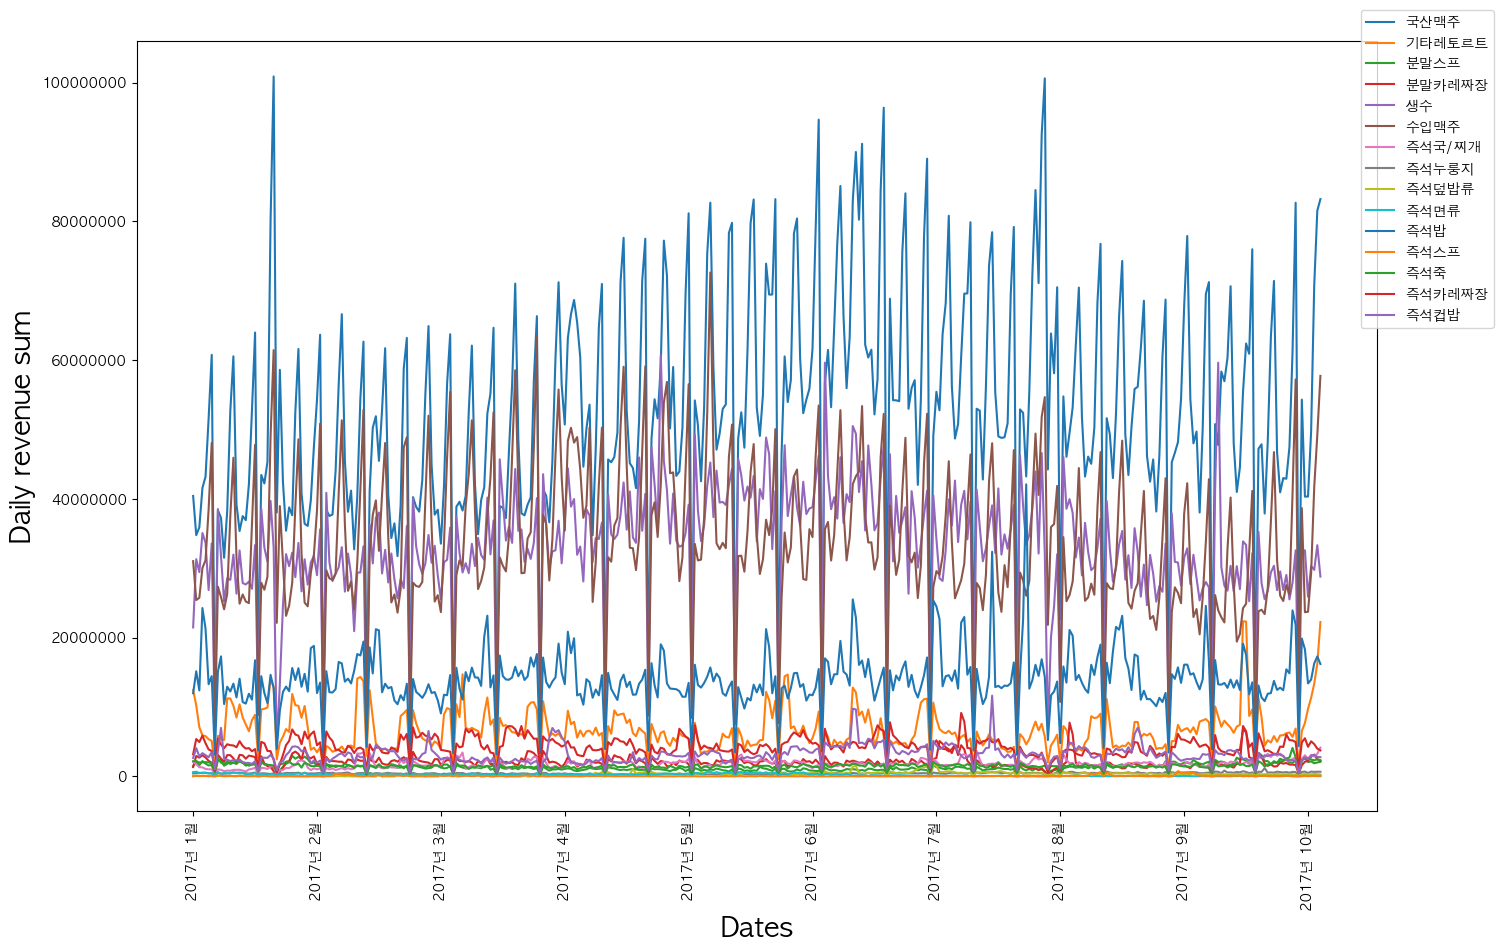

In [26]:
# Group by date & category 3
by_date_cat3 = df_data_1.groupby(['SL_DT', 'PR_CAT3']).sum()

plt.rc('font', family='AppleGothic') # 한글 설정!!!!!
fig, ax = plt.subplots(figsize=(16, 10))
ax.ticklabel_format(useOffset=False, style='plain')

ax = by_date_cat3.unstack()['SL_SUM'].plot(ax=ax, fontsize= 10)
# ax = by_date_cat3.unstack()['SL_SUM'].plot(ax=ax, fontsize= 10)

ax.set_ylabel("Daily revenue sum", size= 20)
ax.set_xlabel("Dates", size= 20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12)) # set number of xticks
_ = ax.set_xticklabels(['2017년 ' +str(i)+'월' for i in range(13)], rotation='vertical' )
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

KeyError: 'SL_PRICE'

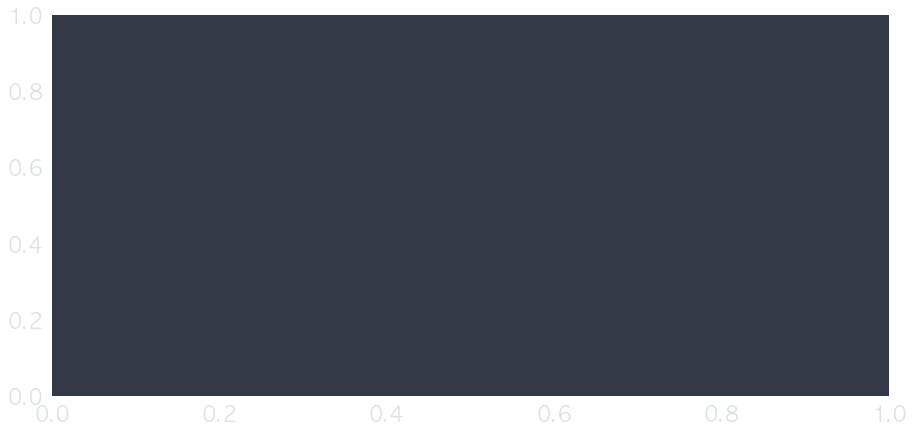

In [11]:
plt.rc('font', family='AppleGothic') # 한글 설정!!!!!
fig, ax = plt.subplots(figsize=(15, 7))
ax.ticklabel_format(useOffset=False, style='plain')

ax = by_date_cat3.unstack()['SL_PRICE'].plot(ax=ax, fontsize= 10)
ax.set_ylabel("Product Price", size= 20)
ax.set_xlabel("Dates", size= 20)
_ = ax.set_xticklabels(by_date_cat3.index.levels[0])

In [ ]:
plt.rc('font', family='AppleGothic') # 한글 설정!!!!!
fig, ax = plt.subplots(figsize=(15, 7))
ax.ticklabel_format(useOffset=False, style='plain')

ax = by_date_cat3.unstack()['SL_QUAN'].plot(ax=ax, fontsize= 10)
ax.set_ylabel("# Product sold", size= 20)
ax.set_xlabel("Dates", size= 20)
_ = ax.set_xticklabels(by_date_cat3.index.levels[0])


### Create another DF that has missing > 50% removed

Missing values are:
- variations of temperature, wind, ground temperature, etc
- daily/hourly/daily min&max, etc
- dropping columns that are missing more than 50% of values 

drop for now, replace with previous value later 

In [ ]:
df_data_less_col = df_data_1.loc[:, df_data_1.isnull().mean() < .5]
df_data_less_col.head()

In [ ]:
print("Originial DF had {} columns, after filtering NA > 50% columns has {} columns".format(len(df_data_1.columns), len(df_data_less_col.columns)))

In [ ]:
# show columns that have NAs
na_count = df_data_less_col.isna().sum()
pd.DataFrame([[k, v] for k, v in na_count.items() if v > 0])

### Encode categorical values
    - df_data_encoded: encoded data frame

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

LABEL_ENCODERS = defaultdict(LabelEncoder)
object_cols = [k for k, v in df_data_1.iteritems() if v.dtypes == 'object']
print("Variables: {} will be label-encoded".format(object_cols))
df_data_encoded = df_data_1.apply(lambda x: LABEL_ENCODERS[x.name].fit_transform(x))

In [ ]:
# LABEL_ENCODERS['SL_DT'].classes_ # examine an encoder

In [ ]:
df_data_encoded.head()

In [ ]:
df_data_encoded.to_pickle('./df_encoded.pkl') # Encoded pickle files

### TODO: Scale numerical values


In [ ]:
numerical_values = df_data_1.drop(categorical_cols, axis = 1)

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

LABEL_ENCODERS = defaultdict(LabelEncoder)
object_cols = [k for k, v in df_data_1.iteritems() if v.dtypes == 'object']
print("Variables: {} will be label-encoded".format(object_cols))
df_data_encoded = df_data_1.apply(lambda x: LABEL_ENCODERS[x.name].fit_transform(x))

### Random Forest 
    - for prediction
    - for exploring feature importance

In [230]:
from sklearn.ensemble import RandomForestRegressor

y = ['SL_SUM', 'SL_QUAN', 'SL_PRICE']

X = df_data_encoded.drop(y, axis=1)
Y = df_data_encoded[y[0]].values             # ONLY SL_SUM, because SUM = QUAN * PRICE
rnd_regressor = sklearn.ensemble.RandomForestRegressor(n_estimators = 50, n_jobs = -1)

rnd_regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [239]:
for name, score in sorted(zip(X.columns, rnd_clf.feature_importances_), key=lambda x: x[1], reverse=True):
    print(name, score)

PR_CAT2 0.655876664339475
PR_CAT3 0.10933716979232665
ST_CD 0.030818633192508927
ST_NM 0.030817271019479366
ST_DO 0.02302326465638552
ST_GU 0.0196535139250463
ST_AGE 0.013301238096692498
ST_EARN 0.013029806276312061
SL_DISCOUNT 0.01290469886166128
SL_DICOUNT_RT 0.008735208603530472
SL_DT 0.004991505319578626
DAY 0.003941980816111224
WEEKEND 0.0029489154812762717
PSSN_HR 0.0026636424727189438
PR_CAT1 0.0025333538435208507
AV_PTY_HMDT_TI 0.002323035513615483
LST_TPRT_TI 0.0021797974117009253
HI_TPRT_TI 0.0021012025276741226
MAX_MMNT_WNSP_TI 0.00208698065911081
LST_SEVL_ATMP_TI 0.0020634705700260073
MAX_WNSP_TI 0.002025889656111138
PM10 0.001940564569355763
OZONE 0.0019206285354412293
WNRN_SUM_V 0.001898070831439908
NO2 0.0018944415348282006
HI_SEVL_ATMP_TI 0.0018940420107174992
LST_GRTP_TMPR_V 0.001889884092909361
AV_PTY_HMDT 0.00185114521607733
HI_TPRT 0.0017722443522746089
AV_SRER_TMPR_V 0.001739808974662084
PM2.5 0.001636736622293139
MIN_PTY_HMDT 0.0015390244841199106
MAX_MMNT_WNSP 0.

In [234]:
rnd_regressor.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [235]:
importances = rnd_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [232]:
from sklearn.tree import export_graphviz
export_graphviz(rnd_regressor)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

#### 100 trees 

In [203]:
from sklearn.ensemble import RandomForestRegressor

y = ['SL_SUM', 'SL_QUAN', 'SL_PRICE']

X = df_data_encoded.drop(y, axis=1)
Y = df_data_encoded[y[0]]           # ONLY SL_SUM, because SUM = QUAN * PRICE
rnd_regressor2 = sklearn.ensemble.RandomForestRegressor(n_estimators = 100, n_jobs = -1)

rnd_regressor2.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [211]:
import pickle
with open("rnd_regressor (trees=50).pkl", 'rb') as f:
    rnd_regressor = pickle.load(f)

from sklearn.tree import export_graphviz
export_graphviz(rnd_regressor)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [223]:
for name, score in sorted(zip(X.columns, rnd_clf.feature_importances_)):
    print(name, score)

AV_BEF_AMCL 0.000712149834561431
AV_CM10_UNDR_TMPR_V 0.000561328470693988
AV_CM20_UNDR_TMPR_V 0.0005842855214562438
AV_CM30_UNDR_TMPR_V 0.0008097562273166722
AV_CM5_UNDR_TMPR_V 0.0004860015087203908
AV_DPN_TMPR_V 0.0009412935155634181
AV_LRCL_AMCL 0.0007161264870159653
AV_PTY_HMDT 0.00185114521607733
AV_PTY_HMDT_TI 0.002323035513615483
AV_SEVL_ATMP 4.980528128726836e-05
AV_SPOT_ATMP 0.00041104563238768765
AV_SRER_TMPR_V 0.001739808974662084
AV_STPR_V 0.0008524731540646523
AV_TPRT 0.0011597844972763374
AV_WNSP 0.0007424274664572298
CANICULE 7.304459389967345e-05
CLOSE 9.500915484803898e-05
CM100_UNDR_TMPR_V 0.001006763162295412
CM150_UNDR_TMPR_V 0.0011616435528296071
CM300_UNDR_TMPR_V 0.0011509103771630066
CM500_UNDR_TMPR_V 0.0013189218280415332
CM50_UNDR_TMPR_V 0.0006693970557168778
CO 0.0006167467521931354
DAY 0.003941980816111224
D_9H_FR_9H_TO_AMRN 0.0003152138150026789
D_AMRN 0.0003996461376945712
D_MAX_AFSC 4.1501462713113344e-05
D_MAX_AFSC_TI 4.59394373008499e-05
D_MAX_AMSN 0.0001

### Impute missing values


In [ ]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
imputer.fit(df_data_less_col)
imputer.statistics

### Feature importance detection with Random Forests
- Target variable: SL_SUM (Sales) = SL_QUAN * SL_PRICE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = ['SL_SUM', 'SL_QUAN', 'SL_PRICE']

X = df_data_1.drop(y, axis=1)
Y = df_data_1[y[0]]
rnd_clf = sklearn.ensemble.RandomForestClassifier(n_estimators = 500, n_jobs = -1)

In [ ]:
# Some values are noise from excel functions
Y.iloc[1042]

In [ ]:
Y = Y.replace({'#DIV/0!':0})

In [ ]:
# Cast to numeric
Y['SL_PRICE'] = pd.to_numeric(Y['SL_PRICE'])
set(map(type, Y['SL_PRICE'])) # check

In [ ]:
rnd_clf.fit(X, Y['SL_SUM'])